In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **TEMP ALG4**

In [ ]:
import pandas as pd
 
temp_alg4 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg4.csv")
temp_alg4 = temp_alg4.drop(['Unnamed: 0'], axis=1)
print(temp_alg4)

     id  alg  time    3    4    5    6    7    8    9  ...  69993  69994  \
0     1    4     1  937  937  937  937  938  937  937  ...    938    937   
1     1    4     2  937  937  937  939  938  938  938  ...    938    937   
2     1    4     3  937  938  937  938  938  937  938  ...    936    936   
3     1    4     4  938  938  937  937  937  937  937  ...    937    937   
4     1    4     5  937  936  937  937  936  936  936  ...    937    937   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    4   996  939  937  938  940  940  939  938  ...    937    939   
996  10    4   997  939  941  940  942  937  939  939  ...    941    940   
997  10    4   998  939  939  938  940  938  939  940  ...    939    938   
998  10    4   999  938  940  939  939  939  940  939  ...    941    940   
999  10    4  1000  940  939  941  941  940  939  939  ...    939    939   

     69995  69996  69997  69998  69999  70000  70001  70002  
0      936    938    937 

In [ ]:
Y = temp_alg4.iloc[:,0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
995    10
996    10
997    10
998    10
999    10
Name: id, Length: 1000, dtype: int64

In [ ]:
X = temp_alg4.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,69993,69994,69995,69996,69997,69998,69999,70000,70001,70002
0,937,937,937,937,938,937,937,936,937,937,...,938,937,936,938,937,938,938,939,938,937
1,937,937,937,939,938,938,938,937,937,937,...,938,937,938,936,939,936,938,938,938,937
2,937,938,937,938,938,937,938,938,939,937,...,936,936,938,939,937,939,938,936,938,937
3,938,938,937,937,937,937,937,938,938,938,...,937,937,938,937,936,937,937,937,937,939
4,937,936,937,937,936,936,936,937,937,937,...,937,937,936,936,937,937,938,938,939,938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,939,937,938,940,940,939,938,941,939,938,...,937,939,940,940,939,941,938,939,939,939
996,939,941,940,942,937,939,939,940,939,939,...,941,940,938,938,940,939,940,940,940,939
997,939,939,938,940,938,939,940,939,938,940,...,939,938,939,939,939,938,941,938,941,941
998,938,940,939,939,939,940,939,938,938,940,...,941,940,941,939,939,939,938,940,938,940


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

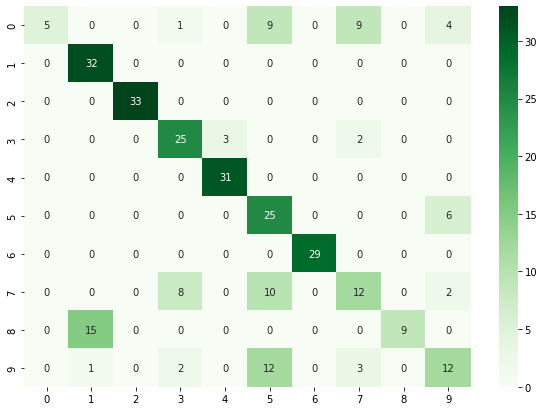

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.18      0.30        28
           2       0.67      1.00      0.80        32
           3       1.00      1.00      1.00        33
           4       0.69      0.83      0.76        30
           5       0.91      1.00      0.95        31
           6       0.45      0.81      0.57        31
           7       1.00      1.00      1.00        29
           8       0.46      0.38      0.41        32
           9       1.00      0.38      0.55        24
          10       0.50      0.40      0.44        30

    accuracy                           0.71       300
   macro avg       0.77      0.70      0.68       300
weighted avg       0.76      0.71      0.69       300



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


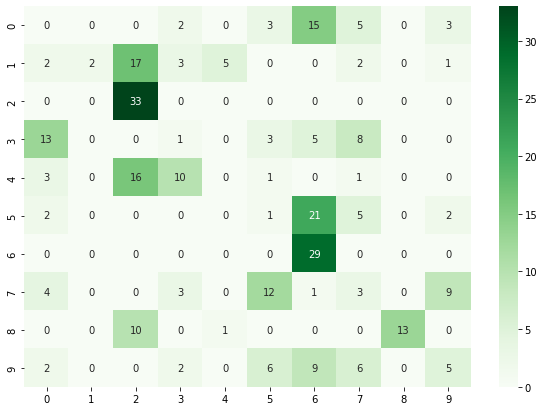

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        28
           2       1.00      0.06      0.12        32
           3       0.43      1.00      0.61        33
           4       0.05      0.03      0.04        30
           5       0.00      0.00      0.00        31
           6       0.04      0.03      0.04        31
           7       0.36      1.00      0.53        29
           8       0.10      0.09      0.10        32
           9       1.00      0.54      0.70        24
          10       0.25      0.17      0.20        30

    accuracy                           0.29       300
   macro avg       0.32      0.29      0.23       300
weighted avg       0.31      0.29      0.22       300



# **VOLT ALG4**

In [ ]:
import pandas as pd
 
volt_alg4 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg4.csv")
volt_alg4 = volt_alg4.drop(['Unnamed: 0'], axis=1)
print(volt_alg4)

     id  alg  time     3     4     5     6     7     8     9  ...  69993  \
0     1    4     1  1489  1489  1490  1490  1490  1489  1489  ...   1490   
1     1    4     2  1489  1490  1489  1490  1492  1491  1491  ...   1490   
2     1    4     3  1489  1489  1489  1489  1489  1490  1490  ...   1490   
3     1    4     4  1489  1490  1490  1490  1492  1490  1490  ...   1488   
4     1    4     5  1490  1490  1490  1489  1490  1490  1490  ...   1489   
..   ..  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
995  10    4   996  1503  1502  1502  1504  1503  1502  1503  ...   1502   
996  10    4   997  1503  1503  1503  1503  1503  1502  1504  ...   1502   
997  10    4   998  1503  1503  1503  1501  1503  1502  1503  ...   1502   
998  10    4   999  1503  1503  1503  1503  1503  1502  1504  ...   1503   
999  10    4  1000  1502  1503  1503  1503  1504  1504  1504  ...   1503   

     69994  69995  69996  69997  69998  69999  70000  70001  70002  
0     1490   1490 

In [ ]:
Y = volt_alg4.iloc[:,0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
995    10
996    10
997    10
998    10
999    10
Name: id, Length: 1000, dtype: int64

In [ ]:
X = volt_alg4.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,69993,69994,69995,69996,69997,69998,69999,70000,70001,70002
0,1489,1489,1490,1490,1490,1489,1489,1489,1490,1490,...,1490,1490,1490,1491,1490,1489,1490,1490,1490,1490
1,1489,1490,1489,1490,1492,1491,1491,1491,1490,1489,...,1490,1490,1490,1490,1490,1490,1489,1490,1490,1491
2,1489,1489,1489,1489,1489,1490,1490,1490,1489,1489,...,1490,1489,1488,1490,1489,1489,1492,1490,1490,1489
3,1489,1490,1490,1490,1492,1490,1490,1490,1489,1490,...,1488,1490,1489,1491,1491,1491,1491,1489,1492,1489
4,1490,1490,1490,1489,1490,1490,1490,1489,1489,1490,...,1489,1490,1491,1489,1490,1490,1491,1490,1490,1490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1503,1502,1502,1504,1503,1502,1503,1504,1502,1504,...,1502,1503,1501,1502,1503,1503,1502,1502,1502,1502
996,1503,1503,1503,1503,1503,1502,1504,1503,1502,1503,...,1502,1504,1505,1502,1503,1503,1504,1503,1502,1503
997,1503,1503,1503,1501,1503,1502,1503,1503,1503,1503,...,1502,1503,1504,1502,1503,1503,1504,1502,1503,1504
998,1503,1503,1503,1503,1503,1502,1504,1504,1503,1503,...,1503,1504,1503,1501,1503,1503,1502,1503,1501,1503


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

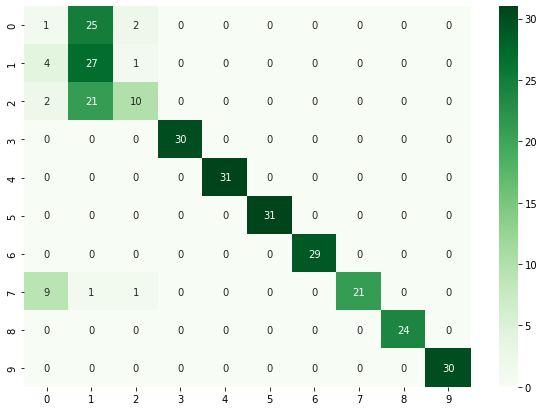

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.06      0.04      0.05        28
           2       0.36      0.84      0.51        32
           3       0.71      0.30      0.43        33
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       1.00      0.66      0.79        32
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        30

    accuracy                           0.78       300
   macro avg       0.81      0.78      0.78       300
weighted avg       0.81      0.78      0.77       300



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


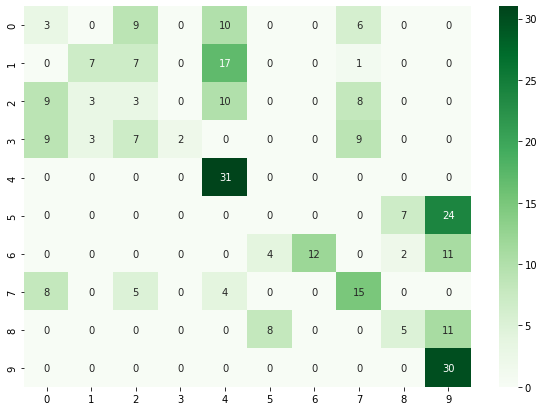

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.10      0.11      0.11        28
           2       0.54      0.22      0.31        32
           3       0.10      0.09      0.09        33
           4       1.00      0.07      0.12        30
           5       0.43      1.00      0.60        31
           6       0.00      0.00      0.00        31
           7       1.00      0.41      0.59        29
           8       0.38      0.47      0.42        32
           9       0.36      0.21      0.26        24
          10       0.39      1.00      0.57        30

    accuracy                           0.36       300
   macro avg       0.43      0.36      0.31       300
weighted avg       0.43      0.36      0.31       300



# **ALGORITMO 4**

In [ ]:
import pandas as pd

temp_alg4 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg4.csv")
temp_alg4 = temp_alg4.drop(['Unnamed: 0'], axis=1)
print(temp_alg4)

volt_alg4 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg4.csv")
volt_alg4 = volt_alg4.drop(['Unnamed: 0', 'id', 'alg'], axis=1)
print(volt_alg4)

     id  alg  time    3    4    5    6    7    8    9  ...  69993  69994  \
0     1    4     1  937  937  937  937  938  937  937  ...    938    937   
1     1    4     2  937  937  937  939  938  938  938  ...    938    937   
2     1    4     3  937  938  937  938  938  937  938  ...    936    936   
3     1    4     4  938  938  937  937  937  937  937  ...    937    937   
4     1    4     5  937  936  937  937  936  936  936  ...    937    937   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    4   996  939  937  938  940  940  939  938  ...    937    939   
996  10    4   997  939  941  940  942  937  939  939  ...    941    940   
997  10    4   998  939  939  938  940  938  939  940  ...    939    938   
998  10    4   999  938  940  939  939  939  940  939  ...    941    940   
999  10    4  1000  940  939  941  941  940  939  939  ...    939    939   

     69995  69996  69997  69998  69999  70000  70001  70002  
0      936    938    937 

In [ ]:
alg4 = pd.merge(temp_alg4, volt_alg4, on='time', suffixes=('_1', '_2'))
alg4

,id,alg,time,3_1,4_1,5_1,6_1,7_1,8_1,9_1,...,69993_2,69994_2,69995_2,69996_2,69997_2,69998_2,69999_2,70000_2,70001_2,70002_2
0,1,4,1,937,937,937,937,938,937,937,...,1490,1490,1490,1491,1490,1489,1490,1490,1490,1490
1,1,4,2,937,937,937,939,938,938,938,...,1490,1490,1490,1490,1490,1490,1489,1490,1490,1491
2,1,4,3,937,938,937,938,938,937,938,...,1490,1489,1488,1490,1489,1489,1492,1490,1490,1489
3,1,4,4,938,938,937,937,937,937,937,...,1488,1490,1489,1491,1491,1491,1491,1489,1492,1489
4,1,4,5,937,936,937,937,936,936,936,...,1489,1490,1491,1489,1490,1490,1491,1490,1490,1490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,4,996,939,937,938,940,940,939,938,...,1502,1503,1501,1502,1503,1503,1502,1502,1502,1502
996,10,4,997,939,941,940,942,937,939,939,...,1502,1504,1505,1502,1503,1503,1504,1503,1502,1503
997,10,4,998,939,939,938,940,938,939,940,...,1502,1503,1504,1502,1503,1503,1504,1502,1503,1504
998,10,4,999,938,940,939,939,939,940,939,...,1503,1504,1503,1501,1503,1503,1502,1503,1501,1503


In [ ]:
Y = alg4.iloc[:,0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
995    10
996    10
997    10
998    10
999    10
Name: id, Length: 1000, dtype: int64

In [ ]:
X = alg4.iloc[:, 3:]
X

,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,11_1,12_1,...,69993_2,69994_2,69995_2,69996_2,69997_2,69998_2,69999_2,70000_2,70001_2,70002_2
0,937,937,937,937,938,937,937,936,937,937,...,1490,1490,1490,1491,1490,1489,1490,1490,1490,1490
1,937,937,937,939,938,938,938,937,937,937,...,1490,1490,1490,1490,1490,1490,1489,1490,1490,1491
2,937,938,937,938,938,937,938,938,939,937,...,1490,1489,1488,1490,1489,1489,1492,1490,1490,1489
3,938,938,937,937,937,937,937,938,938,938,...,1488,1490,1489,1491,1491,1491,1491,1489,1492,1489
4,937,936,937,937,936,936,936,937,937,937,...,1489,1490,1491,1489,1490,1490,1491,1490,1490,1490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,939,937,938,940,940,939,938,941,939,938,...,1502,1503,1501,1502,1503,1503,1502,1502,1502,1502
996,939,941,940,942,937,939,939,940,939,939,...,1502,1504,1505,1502,1503,1503,1504,1503,1502,1503
997,939,939,938,940,938,939,940,939,938,940,...,1502,1503,1504,1502,1503,1503,1504,1502,1503,1504
998,938,940,939,939,939,940,939,938,938,940,...,1503,1504,1503,1501,1503,1503,1502,1503,1501,1503


### **kNN**


In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

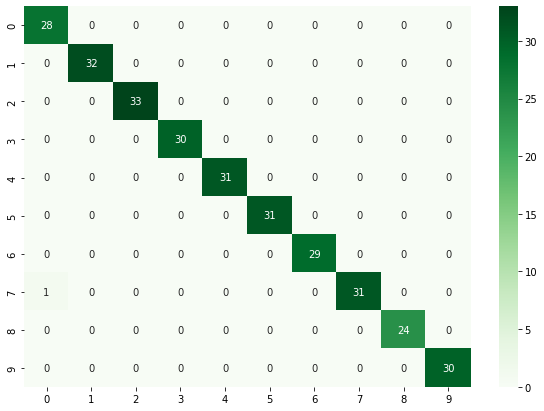

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       1.00      0.97      0.98        32
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        30

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


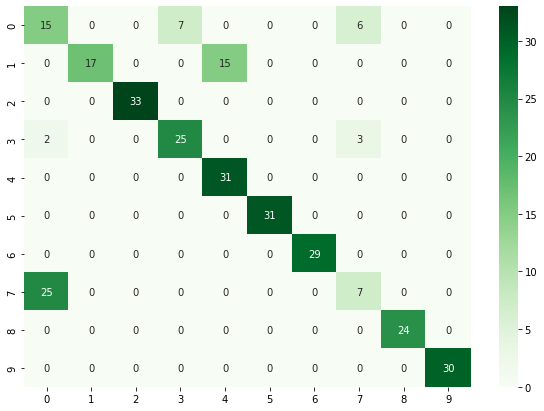

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      0.54      0.43        28
           2       1.00      0.53      0.69        32
           3       1.00      1.00      1.00        33
           4       0.78      0.83      0.81        30
           5       0.67      1.00      0.81        31
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       0.44      0.22      0.29        32
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        30

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.80       300
weighted avg       0.82      0.81      0.80       300

